In [153]:
import numpy as np
import matplotlib.pyplot as plt

In [154]:
def calculate_etf_growth(initial_investment, annual_return, years):
    """Calculate ETF growth over time."""
    return [initial_investment * (1 + annual_return) ** t for t in range(years + 1)]

In [155]:
def calculate_real_estate_growth(
    house_value, down_payment, loan_amount, interest_rate, appreciation_rate, years,mortgage_period
):
    """Calculate real estate capital growth over time."""
    # Monthly interest rate
    monthly_rate = interest_rate / 12
    total_months = mortgage_period * 12

    # Monthly mortgage payment (using fixed-rate formula)
    monthly_payment = loan_amount * (
        monthly_rate * (1 + monthly_rate) ** (total_months) / ((1 + monthly_rate) ** (total_months) - 1)
    )
    print(f"expected monthly payment: {round(monthly_payment)} ILS")
    # Remaining balance and capital growth over years
    remaining_balance = loan_amount
    amount_paid = 0
    capital_growth = []

    for year in range(years + 1):
        # Deduct payments for the year
        for _ in range(12):
            interest = remaining_balance * monthly_rate
            principal = monthly_payment + interest
            amount_paid += principal
            remaining_balance -= principal
        print(f"remaining balance after year {year}: {round(remaining_balance)} ILS")
        # Calculate house value and capital
        current_house_value = house_value * (1 + appreciation_rate) ** year
        print(f"current house value after year {year}: {round(current_house_value)} ILS")
        equity = current_house_value - amount_paid -remaining_balance
        capital_growth.append(equity)

    return capital_growth


In [156]:
def plot_investment_growth(
    etf_growth, real_estate_growth, years
):
    """Plot the capital growth over time."""
    years_range = range(years + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(years_range, etf_growth, label="ETF Investment", marker="o")
    plt.plot(years_range, real_estate_growth, label="Real Estate Investment", marker="o")

    plt.title("Capital Growth Over Time", fontsize=14)
    plt.xlabel("Years", fontsize=12)
    plt.ylabel("Capital (ILS)", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

# Inputs
initial_investment = 400_000
annual_etf_return = 0.10
house_value = 1_500_000
down_payment = 400_000
loan_amount = house_value - down_payment
interest_rate = 0.04
appreciation_rate = 0.02
investment_period = 5
mortgage_period = 20

expected monthly payment: 6666 ILS
remaining balance after year 0: 978259 ILS
current house value after year 0: 1500000 ILS
remaining balance after year 1: 861299 ILS
current house value after year 1: 1530000 ILS
remaining balance after year 2: 748932 ILS
current house value after year 2: 1560600 ILS
remaining balance after year 3: 640979 ILS
current house value after year 3: 1591812 ILS
remaining balance after year 4: 537266 ILS
current house value after year 4: 1623648 ILS
remaining balance after year 5: 437626 ILS
current house value after year 5: 1656121 ILS


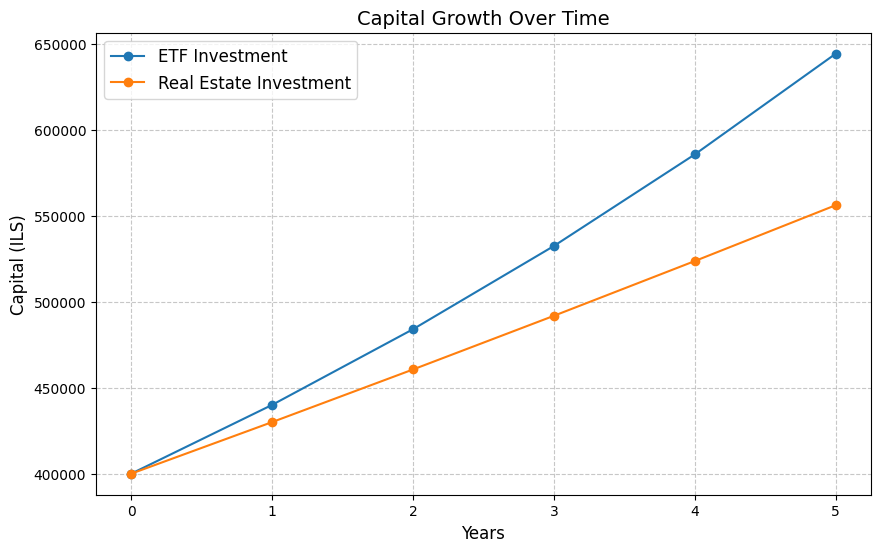

In [157]:
# Calculate growth
etf_growth = calculate_etf_growth(initial_investment, annual_etf_return, investment_period)
real_estate_growth = calculate_real_estate_growth(
    house_value, down_payment, loan_amount, interest_rate, appreciation_rate, investment_period,mortgage_period
)

# Plot results
plot_investment_growth(etf_growth, real_estate_growth, investment_period)